**[p.488] 예제**

In [2]:
accuracy = 461/482
print(accuracy)

0.9564315352697096


In [3]:
misclassification = 1- accuracy
print(misclassification)

0.04356846473029041


In [4]:
sensitivity = 35/50
print(sensitivity)

0.7


In [5]:
specificity = 426/432
print(specificity)

0.9861111111111112


## [채무상환 데이터]
대출자들의 채무 상환 여부를 예측/ 분류하는 복수의 **분류 모델**을 실행하고 각 모델별 분류 정확도를 **오분류율** 기준으로 평가하시오.

사용할 모델 : decision tree, random forest, gradient boost

In [102]:
##패키지 불러오기

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib
import matplotlib as mpl

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier


from sklearn.model_selection import GridSearchCV

from sklearn.metrics import f1_score, roc_curve, auc

#경고창 제거
import warnings
warnings.filterwarnings('ignore')

#한글 적용
from matplotlib import font_manager, rc
import matplotlib.font_manager as fm
mpl.rc('font',family= 'Malgun Gothic')
font_manager.get_fontconfig_fonts()
fontname = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
fontname = font_manager.FontProperties(fname=fontname).get_name()
plt.style.use('seaborn-white')
rc('font', family=fontname)

### 1. 데이터 구성하기

In [33]:
df_raw = pd.read_csv("/home/pirl/Downloads/data2/HMEQ.csv")
df_raw.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1700,30548,40320.0,HomeImp,Other,9.0,0,0.0,101.466002,1.0,8,37.113614
1,1,1800,28502,43034.0,HomeImp,Other,11.0,0,0.0,88.766030,0.0,8,36.884894
2,0,2300,102370,120953.0,HomeImp,Office,2.0,0,0.0,90.992533,0.0,13,31.588503
3,1,2400,34863,47471.0,HomeImp,Mgr,12.0,0,0.0,70.491080,1.0,21,38.263601
4,0,2400,98449,117195.0,HomeImp,Office,4.0,0,0.0,93.811775,0.0,13,29.681827


In [34]:
#결측치 확인
df_raw.isnull().sum()

BAD          0
LOAN         0
MORTDUE      0
VALUE       14
REASON       0
JOB         81
YOJ        205
DEROG        0
DELINQ      30
CLAGE       37
NINQ        56
CLNO         0
DEBTINC      0
dtype: int64

In [35]:
#결측치 대체

#JOB 변수의 결측치는 other 로 대체
df_raw['JOB'].fillna('Other', inplace = True) #fillna 함수 적용 후 df_raw 데이터에 저장 : inplace = True

#숫자형 변수의 결측치는 평균값 입력
df_raw.fillna(df_raw.mean(), inplace=True)

In [36]:
#더미변수 생성
df_raw_dummy = pd.get_dummies(df_raw)
df_raw_dummy.head()

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,REASON_DebtCon,REASON_HomeImp,JOB_Mgr,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self
0,1,1700,30548,40320.0,9.0,0,0.0,101.466002,1.0,8,37.113614,0,1,0,0,1,0,0,0
1,1,1800,28502,43034.0,11.0,0,0.0,88.766030,0.0,8,36.884894,0,1,0,0,1,0,0,0
2,0,2300,102370,120953.0,2.0,0,0.0,90.992533,0.0,13,31.588503,0,1,0,1,0,0,0,0
3,1,2400,34863,47471.0,12.0,0,0.0,70.491080,1.0,21,38.263601,0,1,1,0,0,0,0,0
4,0,2400,98449,117195.0,4.0,0,0.0,93.811775,0.0,13,29.681827,0,1,0,1,0,0,0,0


In [37]:
#목표변수, 설명변수 데이터 지정
df_raw_y = df_raw_dummy['BAD']
df_raw_x = df_raw_dummy.drop('BAD',axis=1,inplace=False)

#데이터 분할 (train:test = 7:3)
df_train_x,df_test_x,df_train_y,df_test_y = train_test_split(df_raw_x,df_raw_y,
                                                            test_size=0.3, random_state=1234)

print("train data X size : {}".format(df_train_x.shape))
print("train data Y size : {}".format(df_train_y.shape))
print("test data X size : {}".format(df_test_x.shape))
print("test data Y size : {}".format(df_test_y.shape))

train data X size : (2623, 18)
train data Y size : (2623,)
test data X size : (1125, 18)
test data Y size : (1125,)


### 2. 분류 모델 실행

In [41]:
#분석모델
model = ['Decision Tree', 'RandomForest', 'GradientBoosting']
#정확도 저장
train_accuracy = []; test_accuracy = []
#f1 저장
model_f1_score = []
#auc score 저장
model_auc = []

In [42]:
## 의사결정 나무

dt_model = DecisionTreeClassifier(max_depth=4, min_samples_leaf=30)
dt_model.fit(df_train_x, df_train_y)

#train 정확도
train_accuracy.append(dt_model.score(df_train_x, df_train_y))
#test 정확도
test_accuracy.append(dt_model.score(df_test_x, df_test_y))
#예측값
y_pred = dt_model.predict(df_test_x)
#roc curve
fpr, tpr, thresholds = roc_curve(df_test_y, y_pred)
roc_auc = auc(fpr, tpr)
#auc저장
model_auc.append(roc_auc)

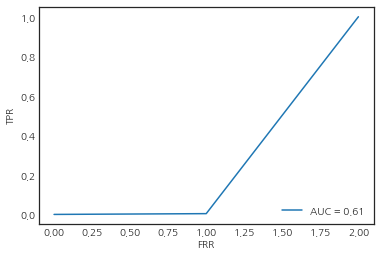

In [43]:
plt.plot(fpr, label='AUC = %0.2f'%roc_auc)
plt.legend(loc='lower right')
plt.ylabel('TPR'); plt.xlabel('FRR')
plt.show()

In [44]:
model_f1_score.append(f1_score(df_test_y,y_pred))

In [45]:
## 랜덤포레스트

rf_model = RandomForestClassifier(min_samples_leaf=20, max_depth=4, n_estimators=100, random_state=1234)
rf_model.fit(df_train_x,df_train_y)

train_accuracy.append(rf_model.score(df_train_x,df_train_y))
test_accuracy.append(rf_model.score(df_test_x, df_test_y))
y_pred = rf_model.predict(df_test_x)
#roc curve
fpr, tpr, thresholds = roc_curve(df_test_y, y_pred)
roc_auc = auc(fpr, tpr)
#auc저장
model_auc.append(roc_auc)

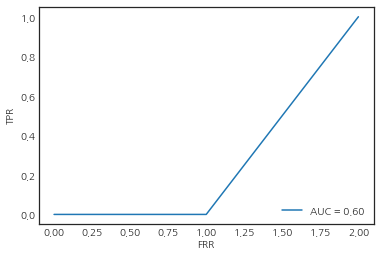

In [46]:
plt.plot(fpr, label='AUC = %0.2f'%roc_auc)
plt.legend(loc='lower right')
plt.ylabel('TPR'); plt.xlabel('FRR')
plt.show()

In [47]:
model_f1_score.append(f1_score(df_test_y, y_pred))

In [48]:
## 그래디언트 부스팅

gb_model = GradientBoostingClassifier(min_samples_leaf=10, max_depth=4, n_estimators=100,
                                      learning_rate = 0.1, random_state=1234)
gb_model.fit(df_train_x,df_train_y)

train_accuracy.append(gb_model.score(df_train_x,df_train_y))
test_accuracy.append(gb_model.score(df_test_x, df_test_y))
y_pred = gb_model.predict(df_test_x)
#roc curve
fpr, tpr, thresholds = roc_curve(df_test_y, y_pred)
roc_auc = auc(fpr, tpr)
#auc저장
model_auc.append(roc_auc)

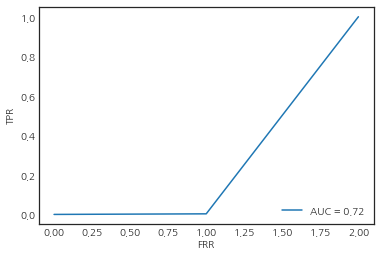

In [49]:
plt.plot(fpr, label='AUC = %0.2f'%roc_auc)
plt.legend(loc='lower right')
plt.ylabel('TPR'); plt.xlabel('FRR')
plt.show()

In [50]:
model_f1_score.append(f1_score(df_test_y, y_pred))

### 3. 모델별 정확도 산출 및 평가

In [67]:
df_eval = pd.DataFrame(index=model)
df_eval['TrainAccuracy'] = train_accuracy
df_eval['TestAccuracy'] = test_accuracy
df_eval['F1Score'] = model_f1_score
df_eval['AUC'] = model_auc
df_eval.round(3)

,TrainAccuracy,TestAccuracy,F1Score,AUC
Decision Tree,0.930,0.925,0.364,0.613
RandomForest,0.927,0.925,0.323,0.596
GradientBoosting,0.977,0.946,0.601,0.720


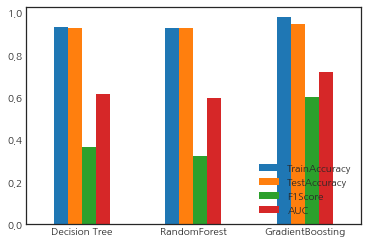

In [68]:
#정확도 bar plot 형성
df_eval.plot.bar(rot=0)
plt.legend(loc='lower right')
plt.grid(axis='Y')

Gradient Boosting 이 가장 높은 정확도와 F1-score , AUCfmf qhdlsek.

Gradient Boosting > Decision Tree > RandomForest

## [통신회사의 고객 이탈 데이터]
통신회사의 고객 이탈 여부를 예측하기 위해 복수의 **분류모델**을 실행하고 각 모델별 분류 정확도를 **오분류율과 향상도** 기준으로 평가하시오.

사용할 모델 : decision tree, random forest, gradient boost, KNN

### 1. 데이터 구성하기

In [83]:
df_raw = pd.read_csv("/home/pirl/Downloads/data2/통신고객이탈.csv")
df_raw.head()

,CHURN,CUSTOMER_ID,GENDER,AGE,CHARGE_TYPE,HANDSET,USAGE_BAND,SERVICE_DURATION,DROPPED_CALLS,PEAK_CALLS_NO,PEAK_CALLS_TIME,WEEKEND_CALLS_NO,WEEKEND_CALLS_TIME,TOTAL_CALLS_NO,TOTAL_CALLS_TIME
0,Active,K102990,F,31,CAT 100,ASAD170,Med,33.33,6,218,379.8,9,21.6,366,632.4
1,Active,K103280,M,27,CAT 100,S50,Med,30.87,10,373,656.4,11,28.0,411,810.4
2,Active,K103660,M,27,CAT 100,ASAD170,Med,49.40,11,260,582.0,0,0.0,265,614.1
3,Active,K103730,M,61,CAT 100,ASAD170,Med,48.60,1,294,661.8,14,101.5,326,844.0
4,Active,K104560,F,52,CAT 100,S50,Med,56.03,0,221,555.6,7,25.0,274,673.0


In [84]:
df_raw.isnull().sum()

CHURN                 0
CUSTOMER_ID           0
GENDER                0
AGE                   0
CHARGE_TYPE           0
HANDSET               0
USAGE_BAND            0
SERVICE_DURATION      0
DROPPED_CALLS         0
PEAK_CALLS_NO         0
PEAK_CALLS_TIME       0
WEEKEND_CALLS_NO      0
WEEKEND_CALLS_TIME    0
TOTAL_CALLS_NO        0
TOTAL_CALLS_TIME      0
dtype: int64

In [85]:
#명목형 변수 목록
obj_cols = df_raw.select_dtypes('object').columns
for col in obj_cols :
    _n = len(df_raw[col].value_counts())
    print(col, ":", str(_n))

CHURN : 2
CUSTOMER_ID : 930
GENDER : 2
CHARGE_TYPE : 5
HANDSET : 11
USAGE_BAND : 6


In [86]:
df_raw['CHURN'] = np.where(df_raw['CHURN'] == 'Active',0,1)
df_raw.head()

,CHURN,CUSTOMER_ID,GENDER,AGE,CHARGE_TYPE,HANDSET,USAGE_BAND,SERVICE_DURATION,DROPPED_CALLS,PEAK_CALLS_NO,PEAK_CALLS_TIME,WEEKEND_CALLS_NO,WEEKEND_CALLS_TIME,TOTAL_CALLS_NO,TOTAL_CALLS_TIME
0,0,K102990,F,31,CAT 100,ASAD170,Med,33.33,6,218,379.8,9,21.6,366,632.4
1,0,K103280,M,27,CAT 100,S50,Med,30.87,10,373,656.4,11,28.0,411,810.4
2,0,K103660,M,27,CAT 100,ASAD170,Med,49.40,11,260,582.0,0,0.0,265,614.1
3,0,K103730,M,61,CAT 100,ASAD170,Med,48.60,1,294,661.8,14,101.5,326,844.0
4,0,K104560,F,52,CAT 100,S50,Med,56.03,0,221,555.6,7,25.0,274,673.0


In [87]:
df_raw['CHURN'].value_counts()

0    750
1    180
Name: CHURN, dtype: int64

### 2. 분류 모델링 과정에서 생성한 모델 실행

In [88]:
#분석모델
model = ['Decision Tree', 'RandomForest', 'GradientBoosting']
#정확도 저장
train_accuracy = []; test_accuracy = []
#f1 저장
model_f1_score = []
#auc score 저장
model_auc = []

In [89]:
#의사결정나무

estimator = DecisionTreeClassifier()

para_depth = [depth for depth in range(1,11)]
para_split = [n_split * 10 for n_split in range(1,11)]
para_leaf = [n_leaf * 2 for n_leaf in range(1,11)]

param_grid={'max_depth': para_depth, 'min_samples_split': para_split, 'min_samples_leaf': para_leaf}
grid_dt = GridSearchCV(estimator, param_grid, scoring='accuracy', n_jobs=-1)
grid_dt.fit(df_train_x, df_train_y)

print('best estimator model:\n{}'.format(grid_dt.best_estimator_))
print('\nbest parameter:\n{}'.format(grid_dt.best_params_))
print('\nbest score: \n{}'.format(grid_dt.best_score_.round(3)))

best estimator model:
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=4, min_samples_split=10,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

best parameter:
{'max_depth': 6, 'min_samples_leaf': 4, 'min_samples_split': 10}

best score: 
0.936


In [90]:
## 의사결정 나무

dt_model = DecisionTreeClassifier(max_depth=10, min_samples_leaf=2, min_samples_split=10)
dt_model.fit(df_train_x, df_train_y)

#train 정확도
train_accuracy.append(dt_model.score(df_train_x, df_train_y))
#test 정확도
test_accuracy.append(dt_model.score(df_test_x, df_test_y))
#예측값
y_pred = dt_model.predict(df_test_x)
#roc curve
fpr, tpr, thresholds = roc_curve(df_test_y, y_pred)
roc_auc = auc(fpr, tpr)
#auc저장
model_auc.append(roc_auc)

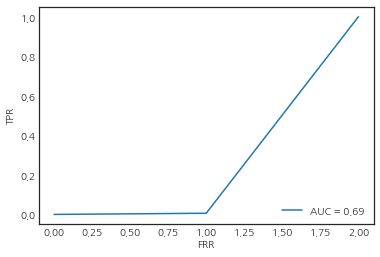

In [91]:
plt.plot(fpr, label='AUC = %0.2f'%roc_auc)
plt.legend(loc='lower right')
plt.ylabel('TPR'); plt.xlabel('FRR')
plt.show()

In [92]:
model_f1_score.append(f1_score(df_test_y,y_pred))

In [93]:
#랜덤포레스트

estimator = RandomForestClassifier(n_estimators=100, random_state=700)

para_depth = [depth for depth in range(1,11)]
para_leaf = [n_leaf * 10 for n_leaf in range(1,11)]

param_grid={'max_depth': para_depth, 'min_samples_leaf': para_leaf}
grid_rf = GridSearchCV(estimator, param_grid, scoring='accuracy', n_jobs=-1)
grid_rf.fit(df_train_x, df_train_y)

print('best estimator model:\n{}'.format(grid_rf.best_estimator_))
print('\nbest parameter:\n{}'.format(grid_rf.best_params_))
print('\nbest score: \n{}'.format(grid_rf.best_score_.round(3)))

best estimator model:
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=9, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=10, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=700, verbose=0, warm_start=False)

best parameter:
{'max_depth': 9, 'min_samples_leaf': 10}

best score: 
0.928


In [94]:
## 랜덤포레스트

rf_model = RandomForestClassifier(min_samples_leaf=10, max_depth=9, random_state=700)
rf_model.fit(df_train_x,df_train_y)

train_accuracy.append(rf_model.score(df_train_x,df_train_y))
test_accuracy.append(rf_model.score(df_test_x, df_test_y))
y_pred = rf_model.predict(df_test_x)
#roc curve
fpr, tpr, thresholds = roc_curve(df_test_y, y_pred)
roc_auc = auc(fpr, tpr)
#auc저장
model_auc.append(roc_auc)

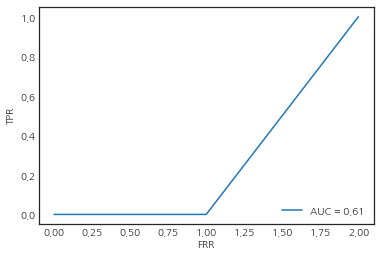

In [95]:
plt.plot(fpr, label='AUC = %0.2f'%roc_auc)
plt.legend(loc='lower right')
plt.ylabel('TPR'); plt.xlabel('FRR')
plt.show()

In [96]:
model_f1_score.append(f1_score(df_test_y, y_pred))

In [97]:
#그래디언트 부스팅

estimator = GradientBoostingClassifier(n_estimators=100, random_state=700)

para_lr = [lr * 0.1 for lr in range(1,10)]
para_depth = [depth for depth in range(1,11)]
para_leaf = [n_leaf * 10 for n_leaf in range(1,11)]

param_grid={'learning_rate': para_lr,'max_depth': para_depth, 'min_samples_leaf': para_leaf}
grid_gb = GridSearchCV(estimator, param_grid, scoring='accuracy', n_jobs=-1)
grid_gb.fit(df_train_x, df_train_y)

print('best estimator model:\n{}'.format(grid_gb.best_estimator_))
print('\nbest parameter:\n{}'.format(grid_gb.best_params_))
print('\nbest score: \n{}'.format(grid_gb.best_score_.round(3)))

best estimator model:
GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.4, loss='deviance', max_depth=7,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=10, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=700,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

best parameter:
{'learning_rate': 0.4, 'max_depth': 7, 'min_samples_leaf': 10}

best score: 
0.949


In [98]:
## 그래디언트 부스팅

gb_model = GradientBoostingClassifier(min_samples_leaf=10, max_depth=7, learning_rate = 0.4, 
                                      random_state=700)
gb_model.fit(df_train_x,df_train_y)

train_accuracy.append(gb_model.score(df_train_x,df_train_y))
test_accuracy.append(gb_model.score(df_test_x, df_test_y))
y_pred = gb_model.predict(df_test_x)
#roc curve
fpr, tpr, thresholds = roc_curve(df_test_y, y_pred)
roc_auc = auc(fpr, tpr)
#auc저장
model_auc.append(roc_auc)

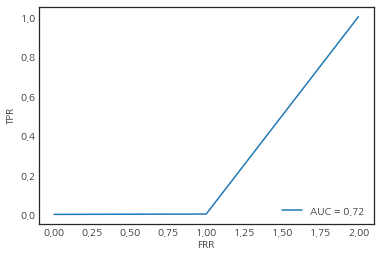

In [99]:
plt.plot(fpr, label='AUC = %0.2f'%roc_auc)
plt.legend(loc='lower right')
plt.ylabel('TPR'); plt.xlabel('FRR')
plt.show()

In [100]:
model_f1_score.append(f1_score(df_test_y, y_pred))

In [104]:
#KNN

knn_uncustomized = KNeighborsClassifier()
knn_uncustomized.fit(df_train_x, df_train_y)
print('Accuracy on traing set:{:.3f}'.format(knn_uncustomized.score(df_train_x,df_train_y)))
print('Accuracy on test set:{:.3f}'.format(knn_uncustomized.score(df_test_x,df_test_y)))

Accuracy on traing set:0.916
Accuracy on test set:0.908


In [105]:
knn_uncustomized

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [106]:
## KNN

knn_model = KNeighborsClassifier(n_neighbors=5, weights='uniform', metric='minkowski')
knn_model.fit(df_train_x,df_train_y)

train_accuracy.append(knn_model.score(df_train_x,df_train_y))
test_accuracy.append(knn_model.score(df_test_x, df_test_y))
y_pred = knn_model.predict(df_test_x)
#roc curve
fpr, tpr, thresholds = roc_curve(df_test_y, y_pred)
roc_auc = auc(fpr, tpr)
#auc저장
model_auc.append(roc_auc)

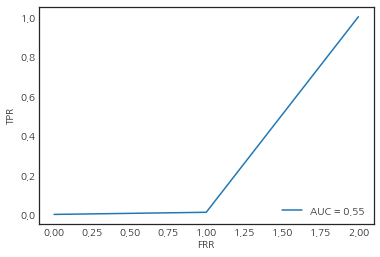

In [107]:
plt.plot(fpr, label='AUC = %0.2f'%roc_auc)
plt.legend(loc='lower right')
plt.ylabel('TPR'); plt.xlabel('FRR')
plt.show()

In [108]:
model_f1_score.append(f1_score(df_test_y, y_pred))

### 3. 모델별 오분류율 산출 및 평가

In [101]:
from sklearn.metrics import confusion_matrix

In [110]:
#모델별 confusion matrix
print('1. Decision Tree')
print("Accuracy on training set:{0:.3f}".format(dt_model.score(df_train_x, df_train_y)))
print("Accuracy on test set:{0:.3f}".format(dt_model.score(df_test_x,df_test_y)))
y_pred = dt_model.predict(df_test_x)
print('Confusion matrix:\n{}'.format(confusion_matrix(df_test_y, y_pred)))


print('\n2. Random Forest')
print("Accuracy on training set:{0:.3f}".format(rf_model.score(df_train_x, df_train_y)))
print("Accuracy on test set:{0:.3f}".format(rf_model.score(df_test_x,df_test_y)))
y_pred = rf_model.predict(df_test_x)
print('Confusion matrix:\n{}'.format(confusion_matrix(df_test_y, y_pred)))


print('\n3. Gradient Boosting')
print("Accuracy on training set:{0:.3f}".format(gb_model.score(df_train_x, df_train_y)))
print("Accuracy on test set:{0:.3f}".format(gb_model.score(df_test_x,df_test_y)))
y_pred = gb_model.predict(df_test_x)
print('Confusion matrix:\n{}'.format(confusion_matrix(df_test_y, y_pred)))


print('\n4. KNN')
print("Accuracy on training set:{0:.3f}".format(knn_model.score(df_train_x, df_train_y)))
print("Accuracy on test set:{0:.3f}".format(knn_model.score(df_test_x,df_test_y)))
y_pred = knn_model.predict(df_test_x)
print('Confusion matrix:\n{}'.format(confusion_matrix(df_test_y, y_pred)))

1. Decision Tree
Accuracy on training set:0.957
Accuracy on test set:0.938
Confusion matrix:
[[1015    6]
 [  64   40]]

2. Random Forest
Accuracy on training set:0.936
Accuracy on test set:0.927
Confusion matrix:
[[1021    0]
 [  82   22]]

3. Gradient Boosting
Accuracy on training set:1.000
Accuracy on test set:0.948
Confusion matrix:
[[1019    2]
 [  57   47]]

4. KNN
Accuracy on training set:0.916
Accuracy on test set:0.908
Confusion matrix:
[[1010   11]
 [  93   11]]


In [119]:
print('1. Decision Tree')
print("%.3f" % (70/1125))

print('\n2. Random Forest')
print("%.3f" % (82/1125))

print('\n3. Gradient Boosting')
print("%.3f" % (59/1125))

print('\n4. KNN')
print("%.3f" % (104/1125))

1. Decision Tree
0.062

2. Random Forest
0.073

3. Gradient Boosting
0.052

4. KNN
0.092


오분류율은 그래디언트 부스팅이 가장 낮고, 그 다음 의사결정나무, 랜덤포레스트, KNN 순서이다.

### 4. 모델별 향상도 산출 및 평가